# Correlation
For measuring the relationship between two measurements, we can take [Pearson's definition of a correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

The data for the following expriment is taken from [Altman & Bland, The Statistician 32, 1983](https://www-users.york.ac.uk/~mb55/meas/ab83.pdf), Fig. 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import pandas as pd
from sklearn import datasets

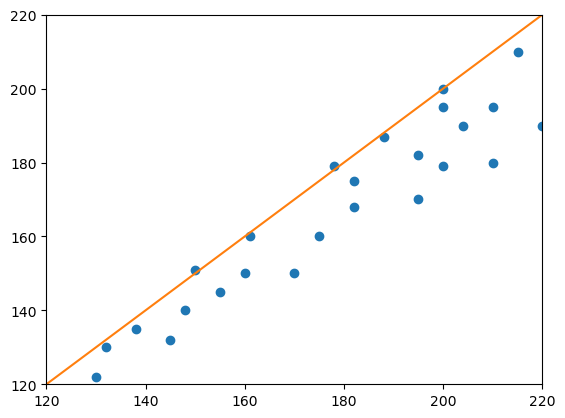

In [2]:
# new measurements
measurement_1 = [130, 132, 138, 145, 148, 150, 155, 160, 161, 170, 175, 178, 182, 182, 188, 195, 195, 200, 200, 204, 210, 210, 215, 220, 200]
measurement_2 = [122, 130, 135, 132, 140, 151, 145, 150, 160, 150, 160, 179, 168, 175, 187, 170, 182, 179, 195, 190, 180, 195, 210, 190, 200]

# scatter plot
plt.plot(measurement_1, measurement_2, "o")
plt.plot([120, 220], [120, 220])
plt.axis([120, 220, 120, 220])
plt.show()

## Pearson correlation coefficient

We can use the Pearson correlation coefficient to calculate the Pearson correlation coefficient:

$r_{xy} = \frac{\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{(\sum_{i=1}^n(x_i - \mu_x)^2}\sqrt{\sum_{i=1}^n(y_i - \mu_y)^2}}$

### Exercise:
Try to implement this yourself!

*Hint*: The expressions in the denominator are equivalent to the standard deviations of the data!

...or use the implementation from [scipy](https://scipy.org/):

In [3]:
# Determine Pearson's r using scipy
stats.pearsonr(measurement_1, measurement_2)

PearsonRResult(statistic=0.9435300113035255, pvalue=1.6002440484659832e-12)

## Ranking data

Ranking allows to obtain a [non-parametric distribution](https://en.wikipedia.org/wiki/Nonparametric_statistics) from our data. In essence, we replace every value with its rank. This iboils down to sorting all the values and replacing the value with its index in the sorted list:

In [4]:
df = pd.DataFrame([measurement_1, measurement_2]).T
df.columns = ['Measurement 1', 'Measurement 2']
df

,Measurement 1,Measurement 2
0,130,122
1,132,130
2,138,135
3,145,132
4,148,140
5,150,151
6,155,145
7,160,150
8,161,160
9,170,150


To rank the data, use, the `rankdata` functions from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html)

In [5]:
measurement_1_ranked = stats.rankdata(measurement_1)
measurement_2_ranked = stats.rankdata(measurement_2)

Text(0, 0.5, 'Rank measurement 2')

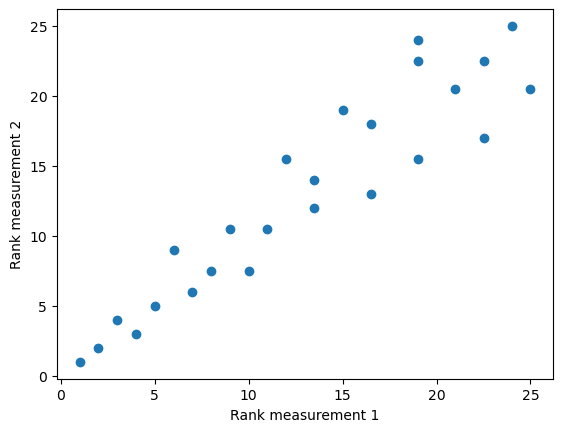

In [6]:
fig, ax = plt.subplots()
ax.scatter(measurement_1_ranked, measurement_2_ranked)
ax.set_xlabel('Rank measurement 1')
ax.set_ylabel('Rank measurement 2')

## Spearman rank correlation coefficient

Now, we can use the above-introduced Pearson correlation coefficient - but on the ranked data! This concept is also commonly known as the [Spearman correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).

### Exercise
Calculate the rank correlation coefficient on the ranked data. Use either your above-introduced correlation coefficient calculation or the [respective function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.spearmanr.html) from scipy.stats

## Pearson vs. Spearman

Let's compare both for a few scenarios to highlight their differences. Plot the raw data, the ranked data for the following scenarios and calculate both correlation coefficients

In [7]:
# Scenario 1
x = np.arange(-10,10, 0.5)
x += np.random.random(len(x))*2
y = x**3 + np.random.random(len(x))*10

In [8]:
# Scenario 2
x = np.arange(-10,10, 0.5)
y = np.tanh(x) + np.random.random(len(x))

In [9]:
# Scenario 3
x = np.arange(-10,10, 0.5)
x += np.random.random(len(x))*2
y = -x**3 + np.random.random(len(x))*10